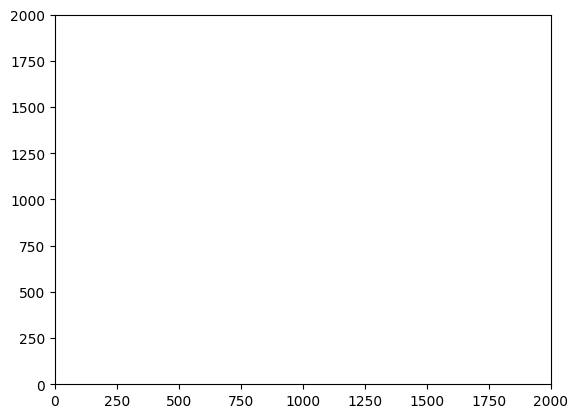

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Function to create a new flock of boids
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

# Function to update boids' positions and velocities for two flocks
def update_two_flocks(positions1, velocities1, positions2, velocities2, frame_number):
    # Update each flock separately
    update_boids(positions1, velocities1)
    update_boids(positions2, velocities2)

    # Parameters for spiraling behavior
    spiral_strength = 0.002 * frame_number
    center = np.array([1000, 1000])

    # Create spiraling effect
    for i in range(boid_count):
        # Vector from center to boid position
        vector_from_center1 = positions1[:, i] - center
        vector_from_center2 = positions2[:, i] - center

        # Perpendicular vector for spiral motion
        perpendicular_vector1 = np.array([-vector_from_center1[1], vector_from_center1[0]])
        perpendicular_vector2 = np.array([vector_from_center2[1], -vector_from_center2[0]])

        # Update velocities for spiral motion
        velocities1[:, i] += spiral_strength * perpendicular_vector1 / (np.linalg.norm(vector_from_center1) + 1e-5)
        velocities2[:, i] += spiral_strength * perpendicular_vector2 / (np.linalg.norm(vector_from_center2) + 1e-5)




# Function to update the boids' positions and velocities
def update_boids(positions, velocities):
    # Constants
    move_to_middle_strength = 0.004
    alert_distance = 100
    formation_flying_distance = 10000
    formation_flying_strength = 0.125

    # Fly towards the middle
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_to_middle_strength

    # Avoid collisions
    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    # Match speed with nearby boids
    velocity_differences = velocities[:, np.newaxis, :] - velocities[:, :, np.newaxis]
    very_far = square_distances > formation_flying_distance
    velocity_differences_if_close = np.copy(velocity_differences)
    velocity_differences_if_close[0, :, :][very_far] = 0
    velocity_differences_if_close[1, :, :][very_far] = 0
    velocities -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength

    # Update positions
    positions += velocities

# Parameters for the flocks
boid_count = 100
limits = np.array([2000, 2000])
positions1 = new_flock(boid_count, np.array([100, 900]), np.array([200, 1100]))
velocities1 = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))
positions2 = new_flock(boid_count, np.array([800, 1500]), np.array([900, 1700]))
velocities2 = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))

# Creating the animation
figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter1 = axes.scatter(positions1[0, :], positions1[1, :], color='blue', marker='o', edgecolor='k', lw=0.5)
scatter2 = axes.scatter(positions2[0, :], positions2[1, :], color='red', marker='o', edgecolor='k', lw=0.5)

def animate(frame):
    update_two_flocks(positions1, velocities1, positions2, velocities2, frame)
    scatter1.set_offsets(positions1.transpose())
    scatter2.set_offsets(positions2.transpose())

anim = animation.FuncAnimation(figure, animate, frames=200, interval=50)

# Display the animation
HTML(anim.to_jshtml())


ValueError: operands could not be broadcast together with shapes (2,100) (2,) (2,100) 

Error in callback <function _draw_all_if_interactive at 0x1105423e0> (for post_execute):


ValueError: operands could not be broadcast together with shapes (2,100) (2,) (2,100) 

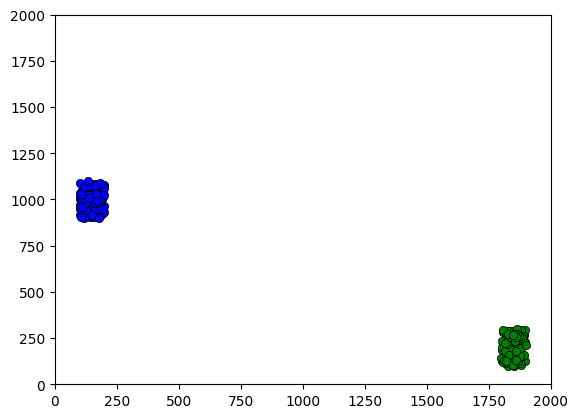

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Function to create a new flock of boids
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

# Function to update the boids' positions and velocities for multiple flocks
def update_boids(flocks, velocities):
    # Constants
    move_to_middle_strength = 0.01
    alert_distance = 100
    formation_flying_distance = 10000
    formation_flying_strength = 0.125
    inter_flock_attraction_strength = 0.005

    for i in range(len(flocks)):
        positions = flocks[i]

        # Fly towards the middle
        middle = np.mean(positions, 1)
        direction_to_middle = positions - middle[:, np.newaxis]
        velocities[i] -= direction_to_middle * move_to_middle_strength

        # Avoid collisions
        separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
        squared_displacements = separations * separations
        square_distances = np.sum(squared_displacements, 0)
        far_away = square_distances > alert_distance
        separations_if_close = np.copy(separations)
        separations_if_close[0, :, :][far_away] = 0
        separations_if_close[1, :, :][far_away] = 0
        velocities[i] += np.sum(separations_if_close, 1)

        # Match speed with nearby boids
        velocity_differences = velocities[i][:, np.newaxis, :] - velocities[i][:, :, np.newaxis]
        very_far = square_distances > formation_flying_distance
        velocity_differences_if_close = np.copy(velocity_differences)
        velocity_differences_if_close[0, :, :][very_far] = 0
        velocity_differences_if_close[1, :, :][very_far] = 0
        velocities[i] -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength

        # Attract to other flocks
        for j in range(len(flocks)):
            if i != j:
                other_flock_middle = np.mean(flocks[j], 1)
                direction_to_other_flock = other_flock_middle - middle
                velocities[i] += direction_to_other_flock * inter_flock_attraction_strength

        # Update positions
        flocks[i] += velocities[i]

# Parameters
boid_count = 100
limits = np.array([2000, 2000])
flock1 = new_flock(boid_count, np.array([100, 900]), np.array([200, 1100]))
flock2 = new_flock(boid_count, np.array([1800, 100]), np.array([1900, 300]))
velocities = [new_flock(boid_count, np.array([0, -20]), np.array([10, 20])),
              new_flock(boid_count, np.array([0, 20]), np.array([-10, -20]))]

# Creating the animation
figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter1 = axes.scatter(flock1[0, :], flock1[1, :], color='blue', marker='o', edgecolor='k', lw=0.5)
scatter2 = axes.scatter(flock2[0, :], flock2[1, :], color='green', marker='o', edgecolor='k', lw=0.5)

def animate(frame):
    update_boids([flock1, flock2], velocities)
    scatter1.set_offsets(flock1.transpose())
    scatter2.set_offsets(flock2.transpose())

anim = animation.FuncAnimation(figure, animate, frames=50, interval=50)

# Display the animation
HTML(anim.to_jshtml())
